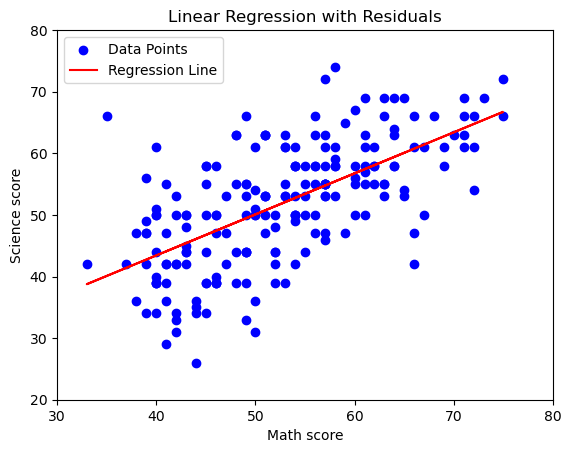

                            OLS Regression Results                            
Dep. Variable:                science   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     130.8
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.39e-23
Time:                        16:28:20   Log-Likelihood:                -691.09
No. Observations:                 200   AIC:                             1386.
Df Residuals:                     198   BIC:                             1393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7579      3.116      5.378      0.0

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#--------------------------------------------------------------------------------

# Load the CSV file (replace 'your_file.csv' with your actual file path)
df = pd.read_csv('/Users/nathan/Downloads/I3R Stat/hsb.csv')

# Define X and Y
X = df[['math']]  # Predictor variable (must be 2D for scikit-learn)
y = df['science']    # Response variable


#--------------------------------------------------------------------------------

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Calculate the sum of squared residuals (SSR)
SSR = np.sum(residuals**2)
#print(f"Sum of Squared Residuals (SSR): {SSR:.2f}")


#--------------------------------------------------------------------------------


# Plot the data, regression line, and residuals
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')

plt.xlabel('Math score')
plt.ylabel('Science score')
plt.xlim(30, 80)
plt.ylim(20, 80)
plt.legend()
plt.title('Linear Regression with Residuals')
plt.show()

X = sm.add_constant(X)

#--------------------------------------------------------------------------------

# Create and fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the p-value for the slope (X variable)
p_value = results.pvalues['math']


# Display the full summary (optional)
print(results.summary())


#--------------------------------------------------------------------------------

# OLS Regression model using standardized math and science scores (giving standardized beta weight)
X_scaled = (df['math'] - df['math'].mean()) / df['math'].std()
y_scaled = (df['science'] - df['science'].mean()) / df['science'].std()

# Add constant and fit OLS model
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y_scaled, X_scaled)
results = model.fit()

# Extract standardized beta weights
print(results.summary())